<h2 style="color: green;">Inception 소개</h2>

일반적으로, 모델 크기를 증가시키면 정확도와 연산량이 증가합니다. 예를 들어, ResNet은 skip connection을 활용해서 모델의 깊이를 증가시켜 성능을 끌어올렸습니다. 하지만 깊어진만큼 연산량이 많아져 학습하는데에 시간이 오래 걸립니다. 이처럼 모델 크기를 증가시키면 연산량이 증가하게 되는데, 이는 mobile이나 제한된 메모리에서 활용해야 할 때, 단점으로 작용합니다.

<h2 style="color: green;">Inception 핵심 아이디어</h2>

### *Inception - 더 작은 합성곱으로 분해*

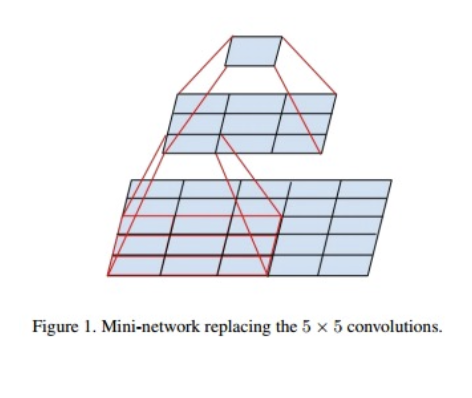

**5x5 convolution, 7x7 convolution을 3x3 convolution으로 분해하면 연산량과 파라 미터가 감소합니다.**

예를 들어, 7 x 7 사이즈의 이미지를 결과값이 3 x 3이 나올 때까지 컨볼루션 한다고 생각해보자. 3 x 3의 커널을 stride 1로 옮겨가면서 2번 컨볼루션을 진행할것이다. 또한 5 x 5의 컨볼루션을 1번 진행하는 방법도 있다. 파라미터 수는 커널의 크기와 출력하는 채널 수에 따라 달라지는데 3 x 3의 커널은 9개의 파라미터가 2번 즉 18개이고 5 x 5의 커널은 25개의 파라미터가 1번이다. 3 x 3으로 2번하는게 더 파라미터 개수로 따졌을 때 효율적이다. 연산량은 3 x 3이 더 많을 수 있다. 여러번 옮겨가면서 컨볼루션을 하기 때문이다. 하지만 3 x 3을 여러번 사용하였을 때 앞서 사용한 파라미터를 공유할수도 있어. 학습의 무게를 줄이고 효율성을 높이는 방법이 VGG, Inception에서 핵심 아이디어로 작용한다.

두 3x3 convolution에 ReLU를 사용한 것이 정확도가 더 높았습니다. 추가적으로 배치 정규화(Batch normalization)을 사용하면 더 정확도가 높아지게 됩니다.

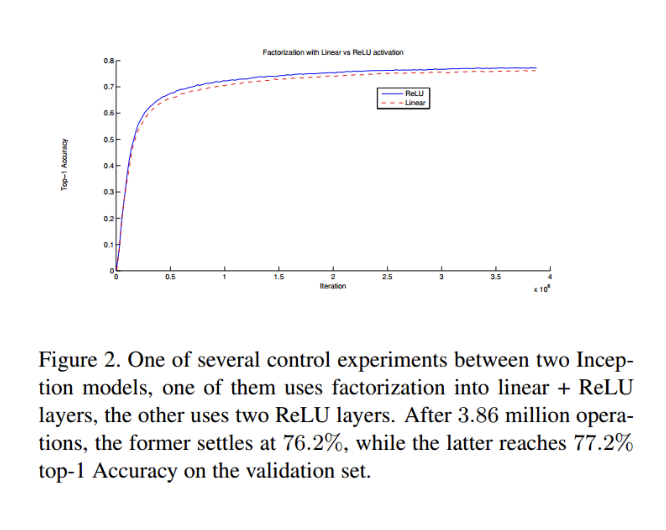

따라서 3x3 convolution보다 큰 filter는 언제든지 3x3 convolution 으로 분해하여 사용하는 것이 좋습니다.

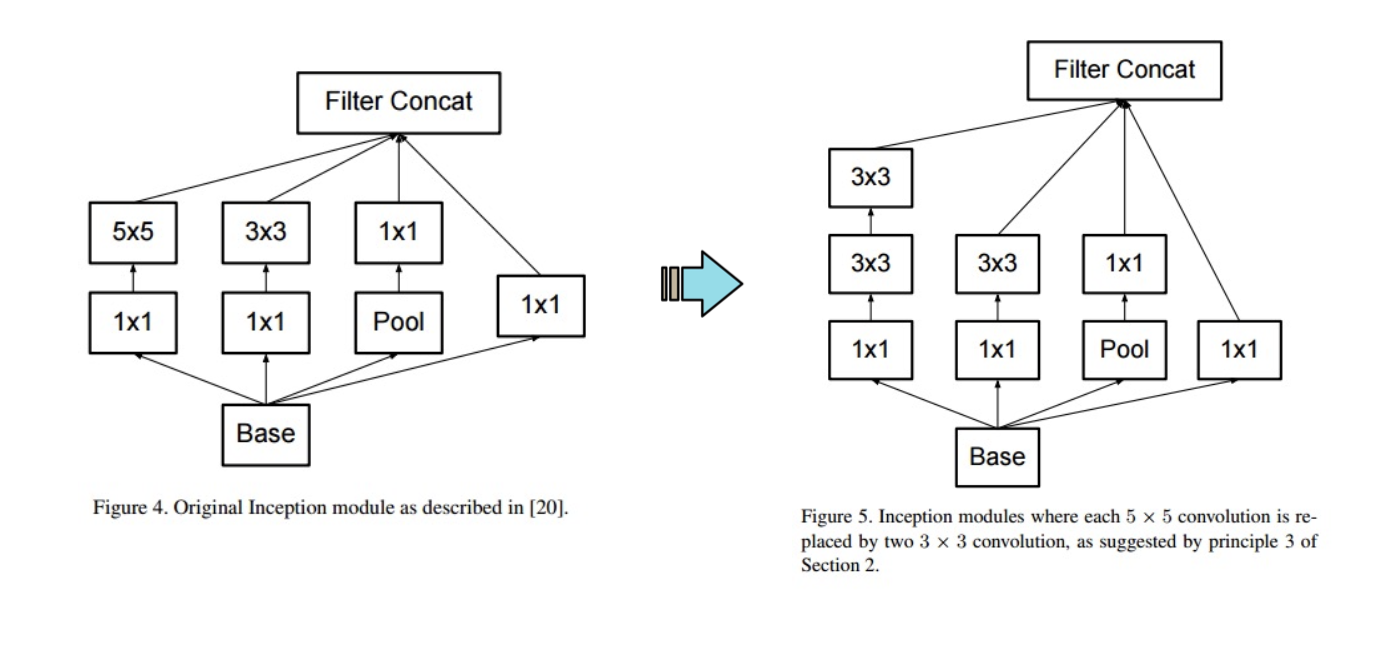

### *Inception - 비대칭 합성곱*

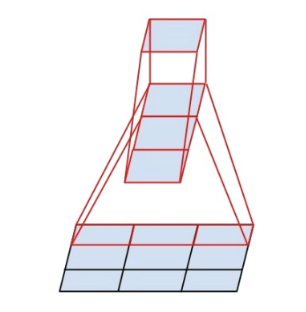

3 x 3 보다 더 작은 컨볼루션으로 학습시키면 효율성을 높일 수 있다. 이 때 등장한 것이 비대칭 합성곱이다. nxn 컨볼루션을 nx1과 1xn 컨볼루션으로 대체하는 것은 일반적으로 컨볼루션 연산에 대한파라미터수와 계산량을 줄일 수 있는 방법입니다.

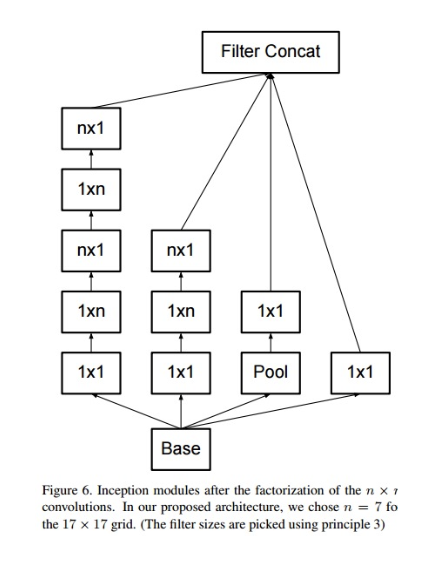

#### 비대칭 합성곱 장단점

**장점**
1. 파라미터 수 감소: nxn 컨볼루션은 n^2개의 파라미터를 가지지만, nx1과 1xn 컨볼루션은 n개의 파라미터를 가지므로 파라미터 수가 줄어듭니다. 이는 모델의 복잡성을 낮추고, 과적합을 방지하는 데 도움을 줄 수 있습니다.
<br></br>
2. 계산량 감소: nxn 컨볼루션은 n^2개의 연산을 수행해야 하지만, nx1과 1xn 컨볼루션은 각각 n개의 연산을 수행하므로 계산량이 줄어듭니다. 따라서, 모델의 훈련 및 추론 속도가 향상될 수 있습니다.
<br></br>
3. 지역적인 특징 강조: nx1과 1xn 컨볼루션은 각각 행과 열 방향의 특징을 강조하는 데에 더 유리합니다. 이는 행렬 형 태의 데이터(예: 이미지)에서 행 또는 열 방향의 패턴을 잘 인식하고, 이러한 방향성이 중요한 작업(예: 텍스트 처리) 에서 도움이 될 수 있습니다.

**단점**
1. 전역적인 특징 감소: nxn 컨볼루션은 전체적인 특징을 고려하는 데에 더 유리합니다. 반면, nx1과 1xn 컨볼루션 은 행 또는 열 방향으로만 정보를 고려하기 때문에, 전체적인 컨텍스트를 포착하는 데 제한이 있을 수 있습니다. 이는 일부 작업에서 성능 저하를 야기할 수 있습니다.
<br></br>
2. 공간적인 변화 고려의 어려움: nxn 컨볼루션은 입력 데이터의 공간적인 변화(예: 이동, 회전)에 대해 더 강인한 특성을 가지지만, nx1과 1xn 컨볼루션은 행 또는 열 방향으로만 정보를 고려하기 때문에 이러한 변화에 민감할 수 있습니다.

### *효율적인 그리드 크기 축소*

**표현적 병목 현상**

표현적 병목 현상은 신경망이 충분한 표현력을 가지지 못해 모델의 성능을 제한하는 현상을 의미합니다. 신경 망이 충분히 깊거나 넓지 않아서 입력 데이터의 다양한 특징이 표현되지 않거나, 중간 레이어에서 정보의 손실 이 발생하여 성능이 제한될 수 있습니다.

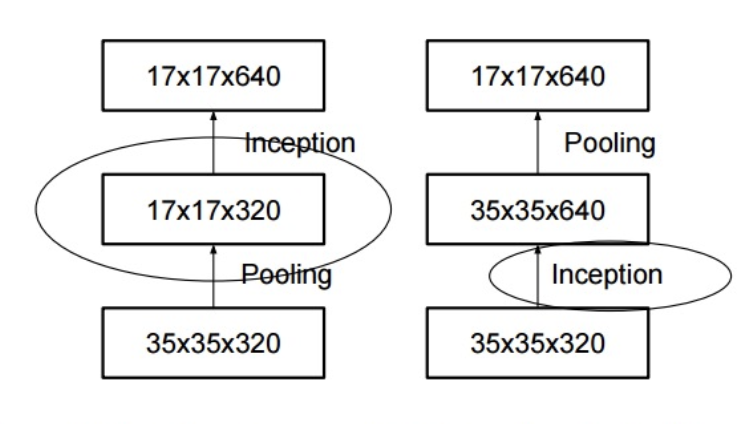

그림을 보면 왼쪽은 연산량이 낮은 대신에 표현력도 감소합니다. 오른쪽은 연산량이 많습니다. 이런 한계를 해결하기 위해서 병렬적으로 처리하여 더해주는 방식을 고안해냈습니다.

아래를 보시면 stride 2를 지닌 pooling layer와 conv layer를 병렬로 사용합니다. 그리고 둘을 연결합니다.

이 방법을 이용하면 표현력을 감소시키지 않고, 연산량을 감 소시킬 수 있다고 말합니다.

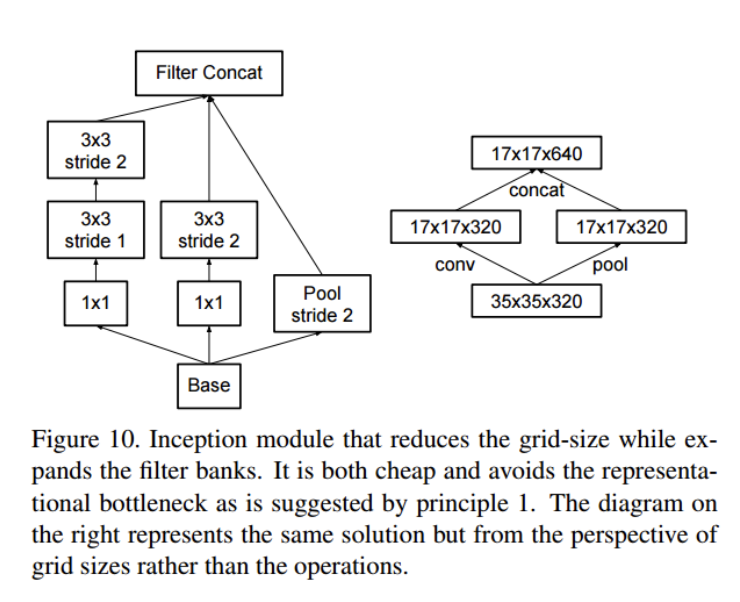

<h2 style="color: green;">Inception 모델 실습</h2>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
class InceptionModule(nn.Module) :
    def __init__(self, in_channels, out_1x1, reduce_3x3, out_3x3, reduce_5x5, out_5x5, out_pool) :
        super(InceptionModule, self).__init__()
        
        #1x1 convolution branch
        self.conv1x1 = nn.Conv2d(in_channels, out_1x1, kernel_size=1)
        
        #3x3 convolution branch
        #커널 수가 1이면 공간적 데이터는 그대로 유지하면서 채널 수만 바꿀 수 있다.
        self.conv3x3_reduce = nn.Conv2d(in_channels, reduce_3x3, kernel_size=1)
        self.conv3x3 = nn.Conv2d(reduce_3x3, out_3x3, kernel_size=3, padding=1)
        
        #5x5 convolution branch
        self.conv5x5_reduce = nn.Conv2d(in_channels, reduce_5x5, kernel_size=1)
        self.conv5x5 = nn.Conv2d(reduce_5x5, out_5x5, kernel_size=5, padding=2)
        
        #Max Pooling branch
        self.pool = nn.MaxPool2d(kernel_size=3, stride=1, padding=1)
        self.conv_pool = nn.Conv2d(in_channels, out_pool, kernel_size=1)
        
        
    def forward(self, x) :
        
        #1x1 convolution branch
        out_1x1 = F.relu(self.conv1x1(x))
        
        #3x3 convolution branch
        out_3x3 = F.relu(self.conv3x3(f.relu(self.conv3x3_reduce(x))))
        
        #5x5 convolution branch
        out5x5 = f.relu(self.conv5x5(F.relu(self.conv5x5_reduce(x))))
        
        #Max Pooling branch
        out_pool = F.relu(self.conv_pool(self.pool(x)))
        
        #Concatenate all branch
        out = torch.cat([out_1x1, out_3x3, out_5x5, out_pool], dim=1)
        
        return out

In [5]:
#Incetion 모델 정의
class InceptionV2(nn.Module) :
    def __init__(self, num_classes=1000) :
        super(InceptionV2, self).__init__()
        
        #Stem layers
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            #padding=3 -> 이미지에 가장자리에 대한 정보 손실 방지
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
            #padding=1 -> 입력값 가장자리에 대한 정보 손실 방지
        )
        
        
        #Inception Modules
        
        #인자값(in_channels, out_1x1, reduce_3x3, out_3x3, reduce_5x5, out_5x5, out_pool)
        self.inception3a = InceptionModule(64, 64, 96, 128, 16, 32, 32)         
        self.inception3b = InceptionModule(256, 128, 128, 192, 32, 96, 64)         
        self.inception4a = InceptionModule(480, 192, 96, 208, 16, 48, 64)         
        self.inception4b = InceptionModule(512, 160, 112, 224, 24, 64, 64)         
        self.inception4c = InceptionModule(512, 128, 128, 256, 24, 64, 64)         
        self.inception4d = InceptionModule(512, 112, 144, 288, 32, 64, 64)         
        self.inception4e = InceptionModule(528, 256, 160, 320, 32, 128, 128)         
        self.inception5a = InceptionModule(832, 256, 160, 320, 32, 128, 128)         
        self.inception5b = InceptionModule(832, 384, 192, 384, 48, 128, 128)
        
        #avg pool
        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(1024, num_classes)
        
        
    def forward(self, x) :
        
        #Stem layers
        x = self.stem(x)
        
        #Inception modules
        x = inception3a(x)
        x = inception3b(x)
        
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)
        
        x = inception4a(x)
        x = inception4b(x)
        x = inception4c(x)
        x = inception4d(x)
        x = inception4e(x)
        
        x = F.max_pool2d(x, kernel_size=3, stride=2, padding=1)
        
        x = inception5a(x)
        x = inception5b(x)
        
        
        #avg pool
        x = self.avg_pool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        